In [ ]:
#Importing standard Python libraries
import numpy as np 
import pandas as pd       
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline
#Generating high quality images for use in paper
%config InlineBackend.figure_formats = ['retina']
#Importing Mathematical algorithms for model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
#Importing libraries for calculating evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import fbeta_score, cohen_kappa_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve


In [ ]:
#Reading the dataset and printing few records.
df = pd.read_csv('pima-diab-data.csv',error_bad_lines=False)
df.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
#Printing data type of all variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Printing summary of data
print ('Total Rows     : ', df.shape[0])
print ('Total Columns  : ', df.shape[1])
print ('\n List of Features : \n', df.columns.tolist())
print ('\nMissing Dataset Values :  ', df.isnull().sum().values.sum())
print ('\nDistinct Values :  \n', df.nunique())

Total Rows     :  768
Total Columns  :  9

 List of Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Dataset Values :   0

Distinct Values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
#Printing summary statistics of the 
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Summary of Total Subjects')

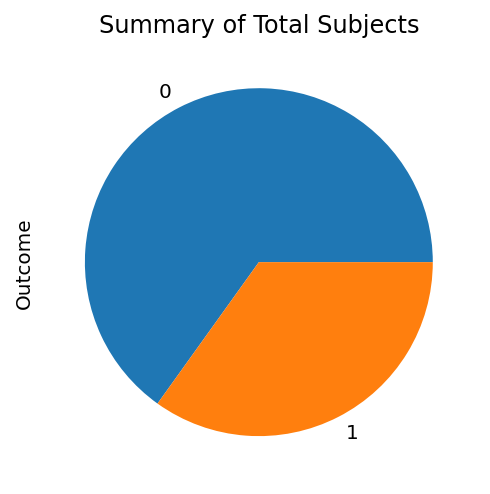

In [ ]:
# Finding the distribution of disease
# '0'-->No Diabetes, '1'--> Yes Diabetes
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind='pie').set_title('Summary of Total Subjects')

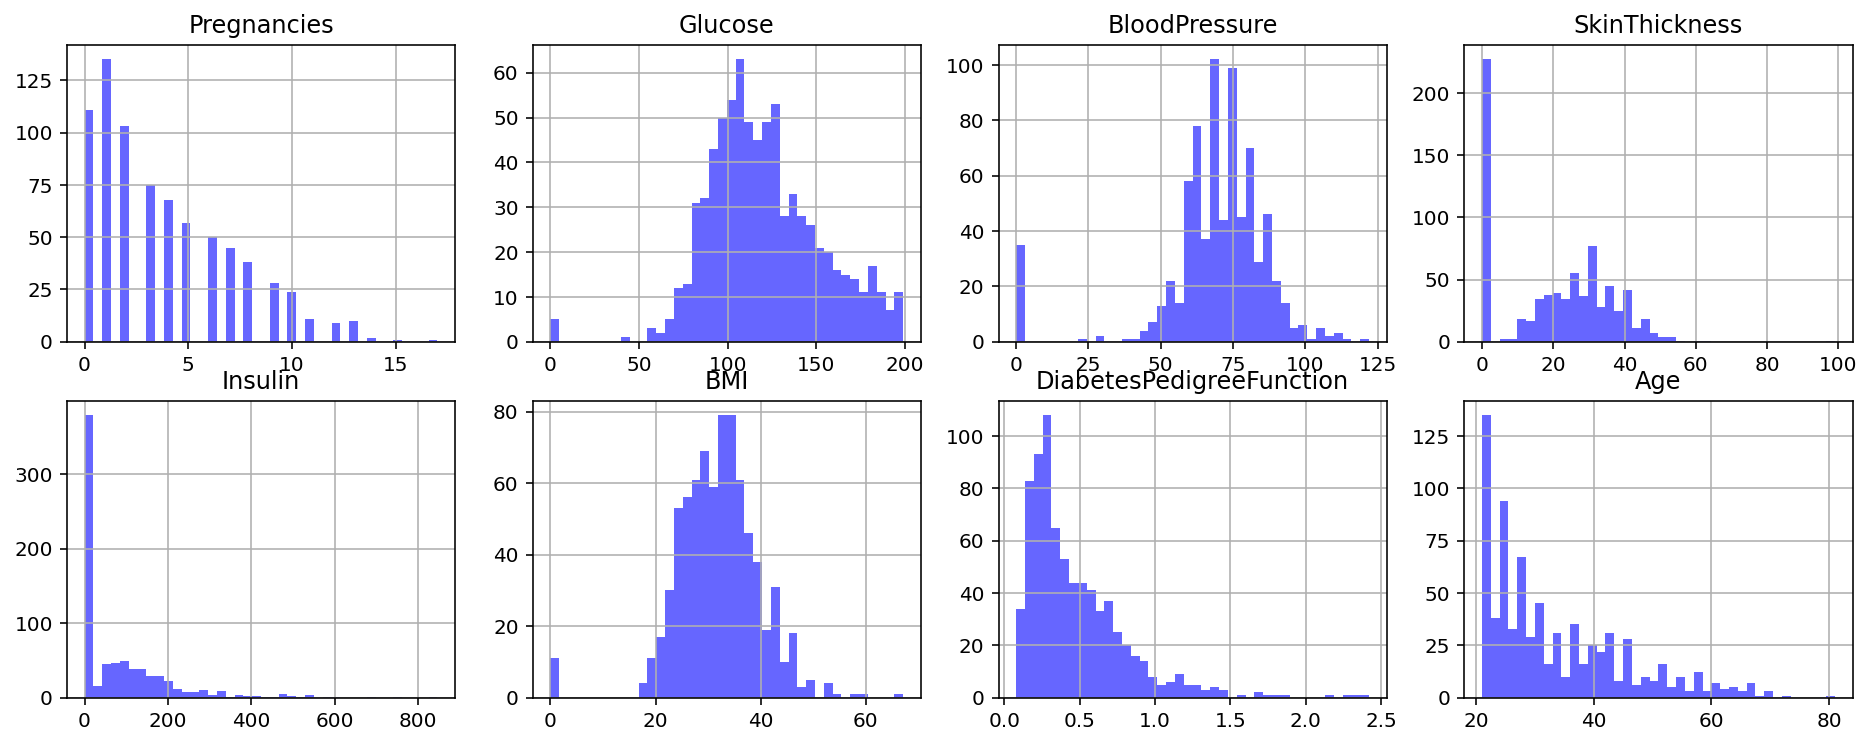

In [ ]:
#Visualize the distribution of variables/features
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(16,6) )
row, col = 0, 0
for x, variable in enumerate(variables):
    if col == COLS - 1:
        row += 1
    col = x % COLS
    
    df[variable].hist(bins=40, color='blue', alpha=0.6, ax=ax[row, col]).set_title(variable)

In [ ]:
#Replace null values with nan
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)



In [ ]:
#Showing null values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


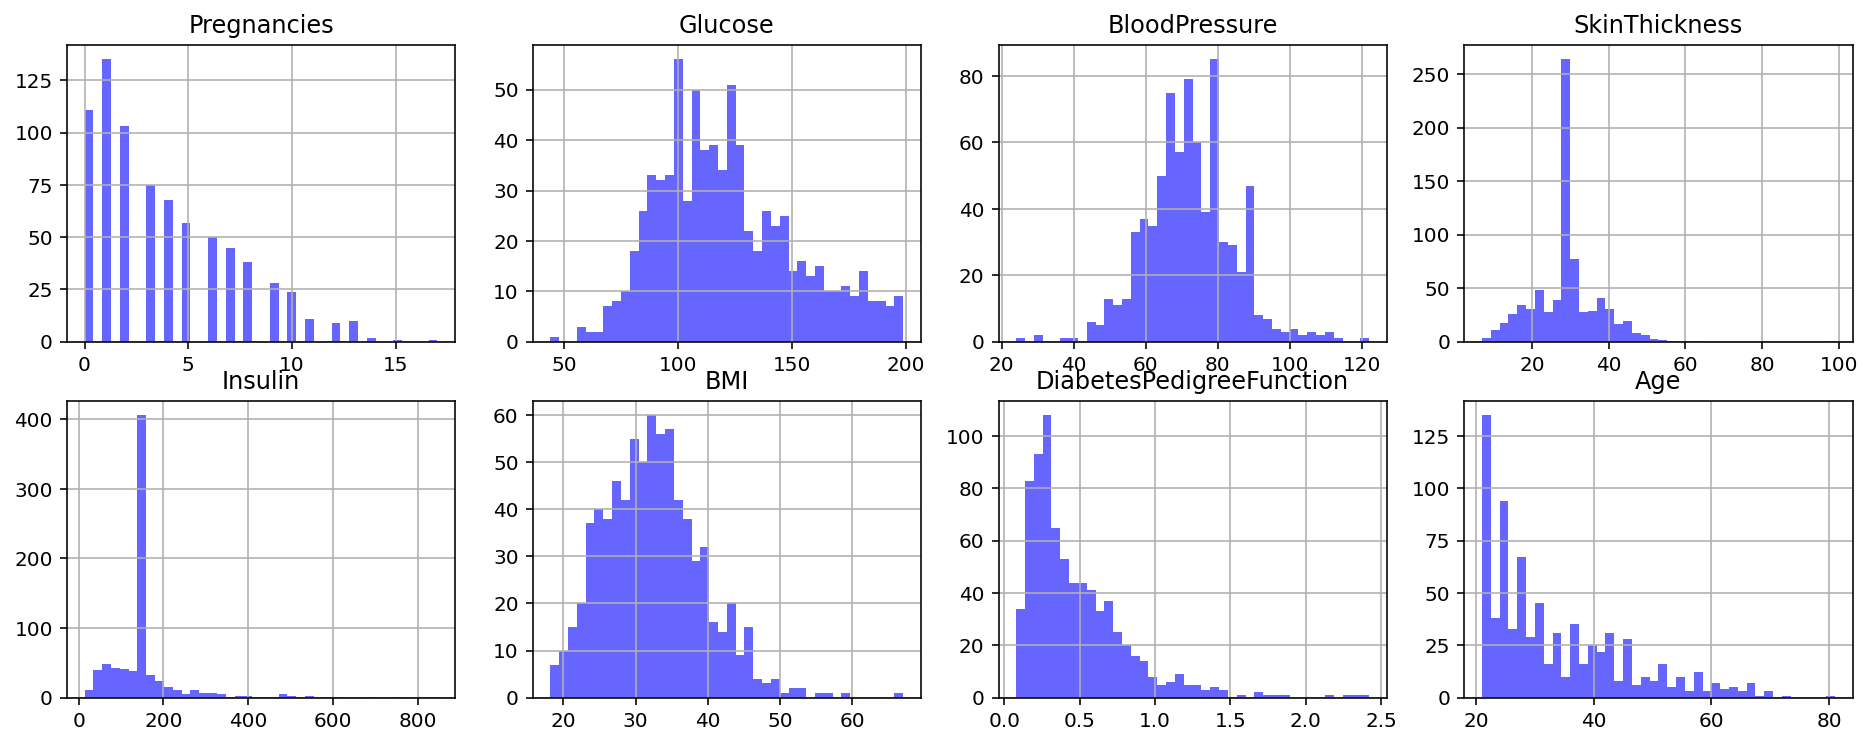

In [ ]:
#Visualize again after removal of null values
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(16,6) )
row, col = 0, 0
for x, variable in enumerate(variables):
    if col == COLS - 1:
        row += 1
    col = x % COLS
    
    df[variable].hist(bins=40, color='blue', alpha=0.6, ax=ax[row, col]).set_title(variable)

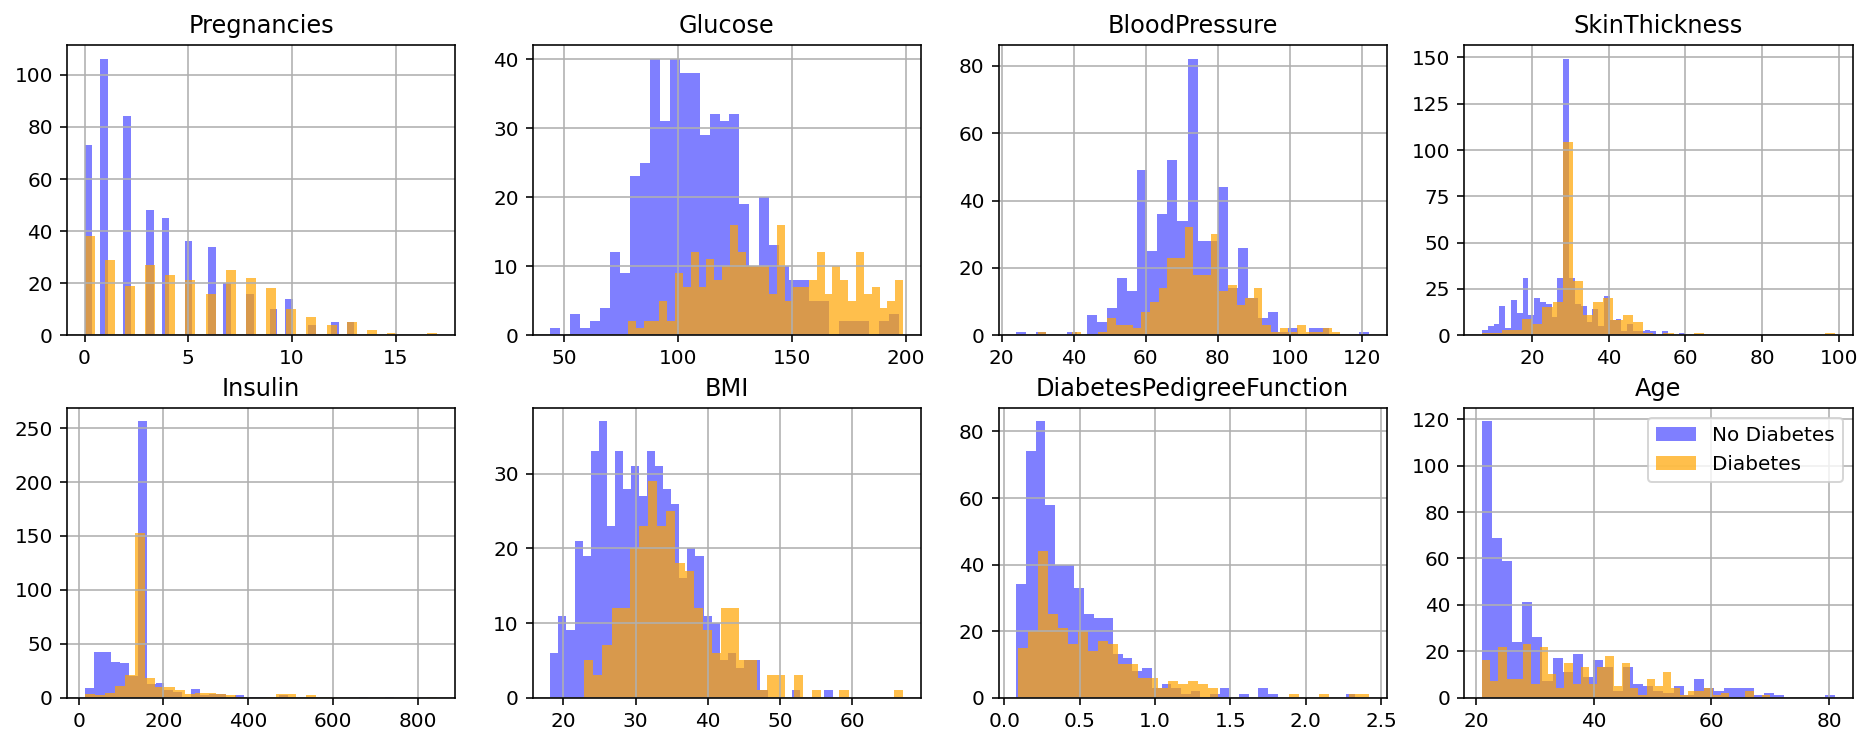

In [ ]:
# To perform feature-outcome distribution visualization
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(16,6) )
row, col = 0, 0
for x, variable in enumerate(variables):
    if col == COLS - 1:
        row += 1
    col = x % COLS
    df[df.Outcome==0][variable].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(variable)
    df[df.Outcome==1][variable].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.25)

In [ ]:
#Creating features X and target intercept y using dataset
X, y = df.drop('Outcome', axis=1), df['Outcome']
print(X.shape, y.shape)


(768, 8) (768,)


Text(0.5, 1.0, 'Top Features using Random Forest')

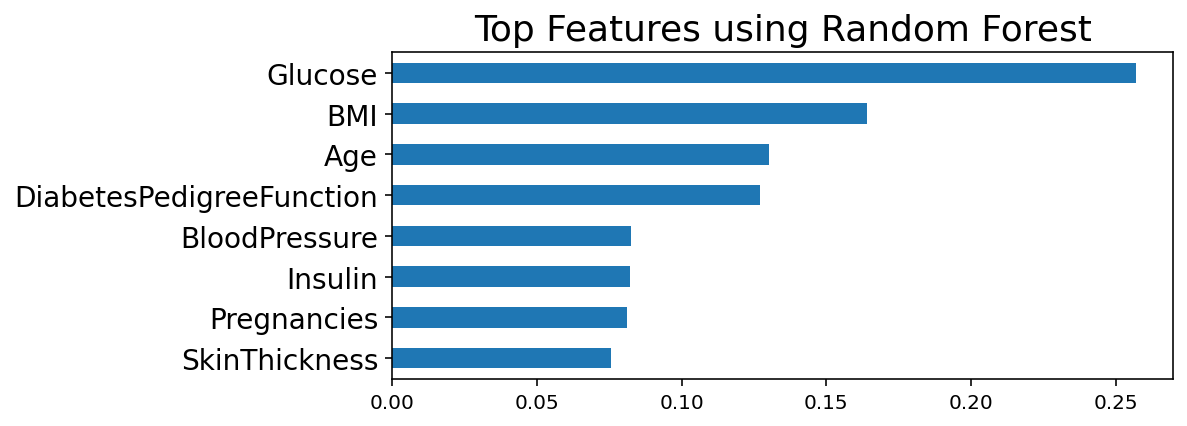

In [ ]:
#Feature Selection using Random Forest
# Create decision tree classifer object
SEED = 40
ran_for_model = RandomForestClassifier(random_state=SEED, n_estimators=100)
# Training model
ran_for_model = ran_for_model.fit(X, y)

# Plotting the Top Features 
(pd.Series(ran_for_model.feature_importances_, index=X.columns)
    .nlargest(9)   
    .plot(kind='barh', figsize=[7,3])
    .invert_yaxis()) 

plt.yticks(size=14)
plt.title('Top Features using Random Forest', size=18)

In [ ]:
#Splitting the dataset into Training and test set
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)   # axis=0 for row, axis=1 for column
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Ordinary Least Squares linear regression model
import statsmodels.api as smo
X = smo.add_constant(X)  
# Fit the model
model = smo.OLS(y, X)

#Baseline model performance evaluation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Model metrics calculation 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    y_pred = model.predict(X_test)

    df_model = pd.DataFrame({'Model'        : [name],
                             'Accuracy'     : [accuracy],
                             'Precision'    : [precision],
                             'Recall'       : [recall],
                             'F1 Score'      : [f1score],
                             'ROC-AUC'       : [rocauc],})   
    return df_model

# To Evaluate models
gnba = GaussianNB()
bnba = BernoulliNB()
mnba = MultinomialNB()
logitreg = LogisticRegression()
randomforests = RandomForestClassifier()


# to merge all models
df_models = pd.concat([baseline_report(gnba, X_train, X_test, y_train, y_test, 'Gaussian NB'),
                       baseline_report(bnba, X_train, X_test, y_train, y_test, 'Bernoulli NB'),
                       baseline_report(mnba, X_train, X_test, y_train, y_test, 'Multinomial NB'),
                       baseline_report(logitreg, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(randomforests, X_train, X_test, y_train, y_test, 'RandomForest'),
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Gaussian NB,0.754072,0.670476,0.593688,0.626736,0.817021
1,Bernoulli NB,0.651473,0.000000,0.000000,0.000000,0.495601
2,Multinomial NB,0.631921,0.462201,0.420377,0.437932,0.651109
3,LogisticRegression,0.775277,0.724607,0.584385,0.643425,0.826600
4,RandomForest,0.771985,0.717942,0.617386,0.656823,0.834282


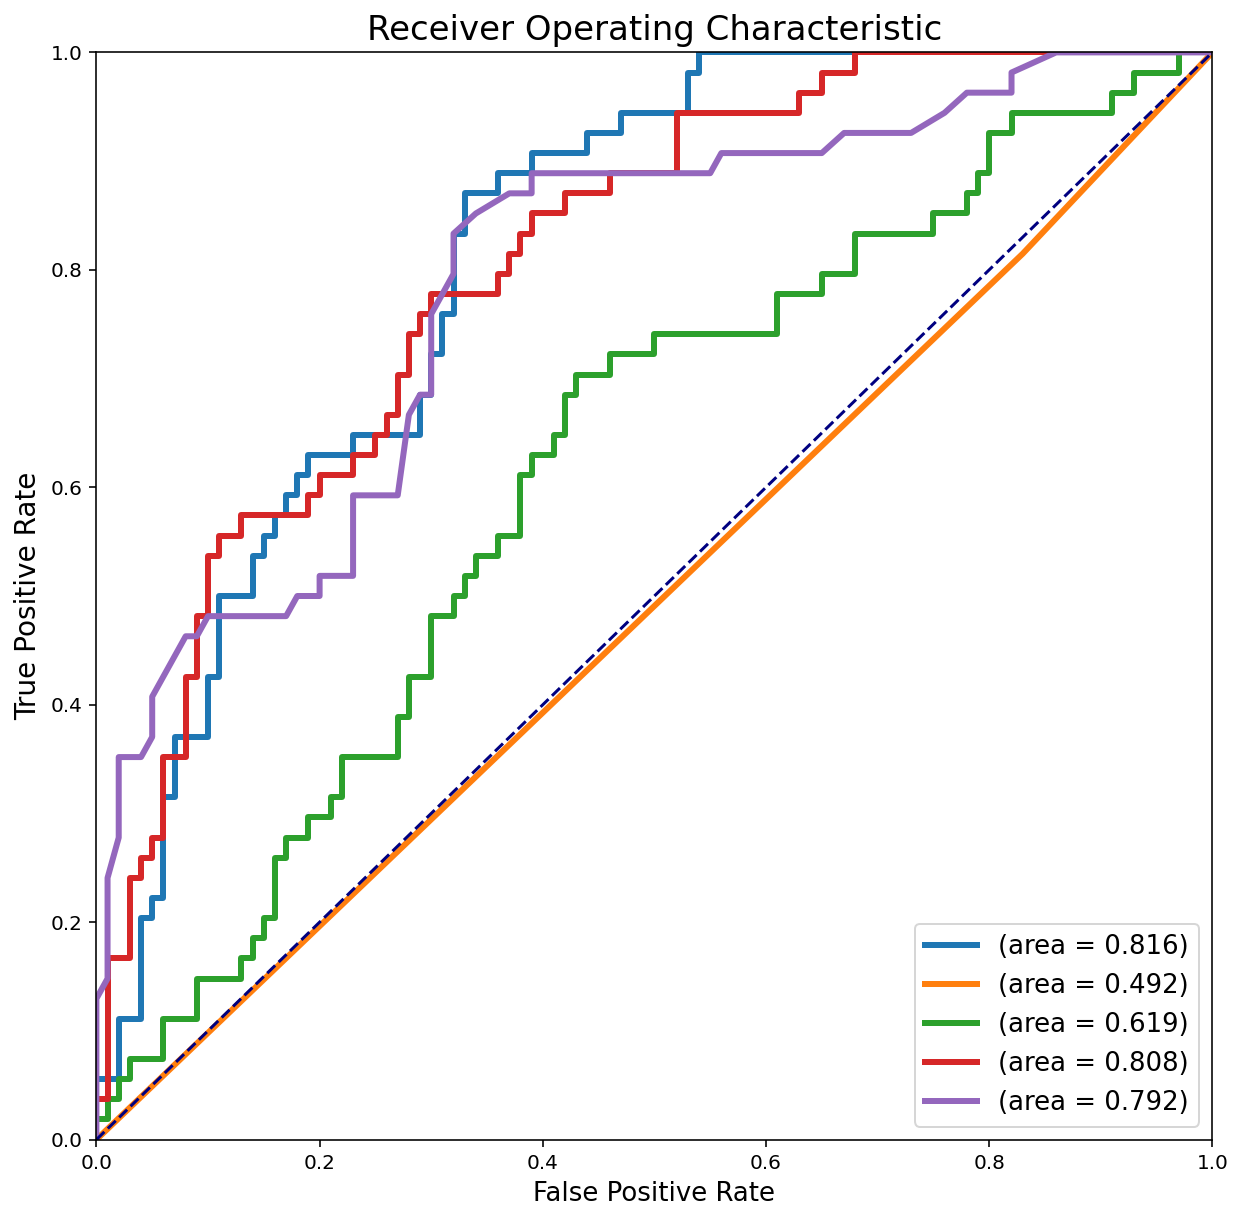

In [ ]:
# plot the ROC curves
plt.figure(figsize=(10,10))

model_name = [gnba, bnba, mnba, logitreg, randomforests]

for x in range(5):
    y_pred = model_name[x].predict_proba(X_test)[:,1]
    FPR, TPR, threshold = roc_curve(y_test, y_pred)
    plt.plot(FPR, TPR, lw=3, label=  '(area = %0.3f)' % auc(FPR, TPR) )

FPR, TPR, threshold = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.show()

In [ ]:

#  See confusion matrix for model 
topmodel = gnb

def build_confusion_matrix(model, threshold=0.2):
    y_pred = (topmodel.predict_proba(X_test)[:, 1] >= threshold)
    confmat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sb.heatmap(confmat, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

from ipywidgets import FloatSlider ,interactive
interactive(lambda threshold: build_confusion_matrix(topmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…